# Convolutional Nets - CIFAR 10 dataset

In this exercise I will gradually build a convolutional net for the CIFAR 10 datasets.

I will explore how adding additional layers or modifying the existing ones
affects the model accuracy. 

I will focus mostly on the neural net architecture and the model's hyperparameters
and not on the training parameters.  

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.datasets import cifar10 # type: ignore
import matplotlib.pyplot as plt

# Load and preprocess the dataset
# CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
# The dataset is divided into 50,000 training images and 10,000 test images.
# The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
# The images are represented as 32x32 pixel arrays with 3 color channels (RGB).

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 166s 1us/step


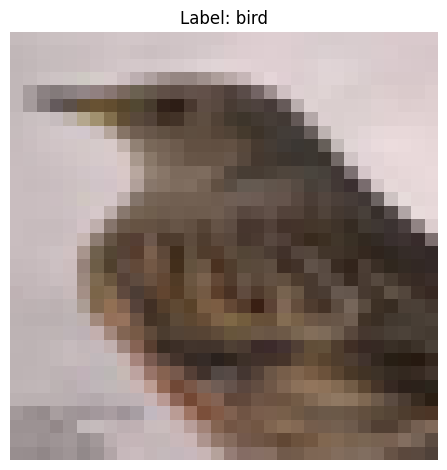

In [27]:
# Let's visualize some of the training images
# Of course they are not very clear due to their small size, but they are representative of the dataset.

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',    
    'dog', 'frog', 'horse', 'ship', 'truck'
]
i = 18  # Index of the image to display
plt.imshow(x_train[i])
plt.title(f"Label: {class_names[y_train[i][0]]}")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Build a simple CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    # The first convolutional layer has 32 filters, the second has 64, and the third has 128.
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and save history
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.3f}')

# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss')

plt.show()
